# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [1]:
# initial imports
import panel as pn
pn.extension('plotly')
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline


Bad key savefig.frameon in file C:\Users\colli\.conda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\colli\.conda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\colli\.conda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need t

In [2]:
# Read the Mapbox API key
# load_dotenv()
mapbox_token = "xxxxxx"


## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
annual_units_mean = sfo_data["housing_units"].groupby(sfo_data.index).mean()
annual_units_mean

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

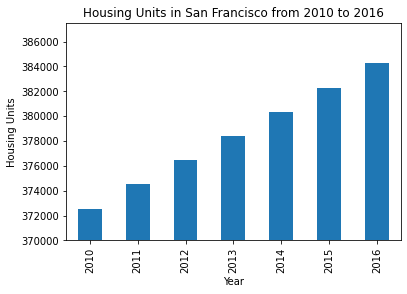

In [5]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
fig_housing_units = annual_units_mean.plot(kind='bar', title="Housing Units in San Francisco from 2010 to 2016")
fig_housing_units.set_xlabel("Year")
fig_housing_units.set_ylabel("Housing Units")
fig_housing_units.set_ylim(370000,387500)

plt.show(fig_housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [6]:
# Calculate the average gross rent and average sale price per square foot
avg_gross_rent = sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby([sfo_data.index]).mean()
avg_gross_rent

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

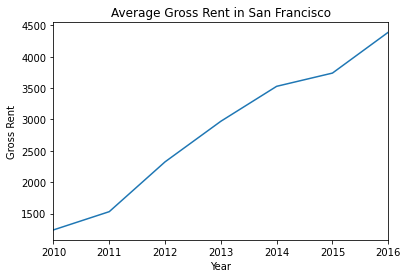

In [7]:
# Plot the Average Gross Rent per Year as a Line Chart 
gross_rent_plot = avg_gross_rent["gross_rent"].plot(kind='line', title="Average Gross Rent in San Francisco")
gross_rent_plot.set_xlabel("Year")
gross_rent_plot.set_ylabel("Gross Rent")

plt.show(gross_rent_plot)

### Average Sales Price per Year

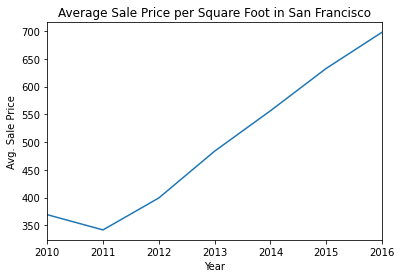

In [8]:
# Plot the Average Sales Price per Year as a line chart
avg_sales_price_plot = avg_gross_rent["sale_price_sqr_foot"].plot(kind='line', title="Average Sale Price per Square Foot in San Francisco")
avg_sales_price_plot.set_xlabel("Year")
avg_sales_price_plot.set_ylabel("Avg. Sale Price")

plt.show(avg_sales_price_plot)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [9]:
# Group by year and neighborhood and then create a new dataframe of the mean values
mean_hood_data = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
mean_hood_data = sfo_data.reset_index()
mean_hood_data.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239

In [10]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
mean_hood_data.hvplot.line("year", "sale_price_sqr_foot", xlabel="Year", ylabel="Average Price Per Square Foot", groupby="neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [11]:
# Getting the data from the top 10 expensive neighborhoods
expensive = mean_hood_data.nlargest(10, 'sale_price_sqr_foot')
expensive = expensive.drop(columns = ["year"]).reset_index()
expensive.head(10)

index               neighborhood  sale_price_sqr_foot  housing_units  \
0    346      Union Square District          2258.702832         382295   
1    388           Presidio Heights          1465.968586         384242   
2    374             Merced Heights          1416.666667         384242   
3    226      Union Square District          1290.472107         378401   
4    262              Miraloma Park          1267.766203         380348   
5    386  Parnassus/Ashbury Heights          1207.997485         384242   
6    382            Outer Richmond           1196.645437         384242   
7    323                     Marina          1132.837361         382295   
8    282            South of Market          1119.838877         380348   
9    300             Corona Heights          1100.791194         382295   

   gross_rent  
0        3739  
1        4390  
2        4390  
3        2971  
4        3528  
5        4390  
6        4390  
7        3739  
8        3528  
9        3739

In [12]:
# Plotting the data from the top 10 expensive neighborhoods
top_ten_plot = expensive.hvplot.bar("neighborhood", "sale_price_sqr_foot", title="Top 10 Expensive Neighborhoods in SFO", 
    xlabel="Neighborhood", ylabel="Avg. Sale Price Per Square Foot", height=500, rot=90)
top_ten_plot

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

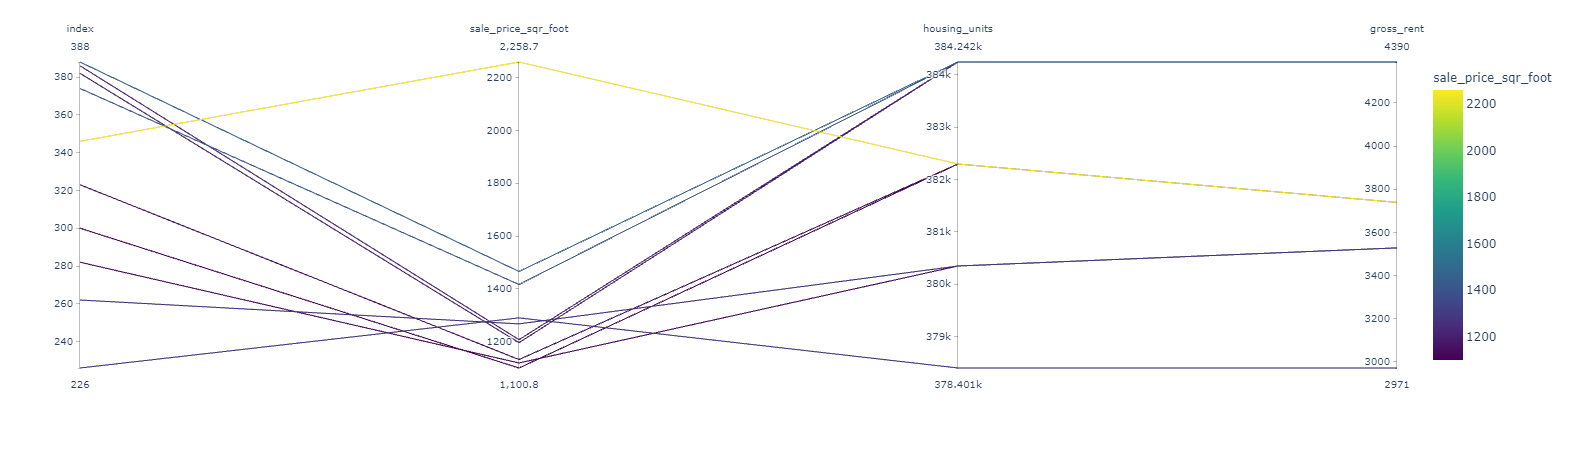

In [20]:
# Parallel Coordinates Plot
px.parallel_coordinates(expensive, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Viridis)

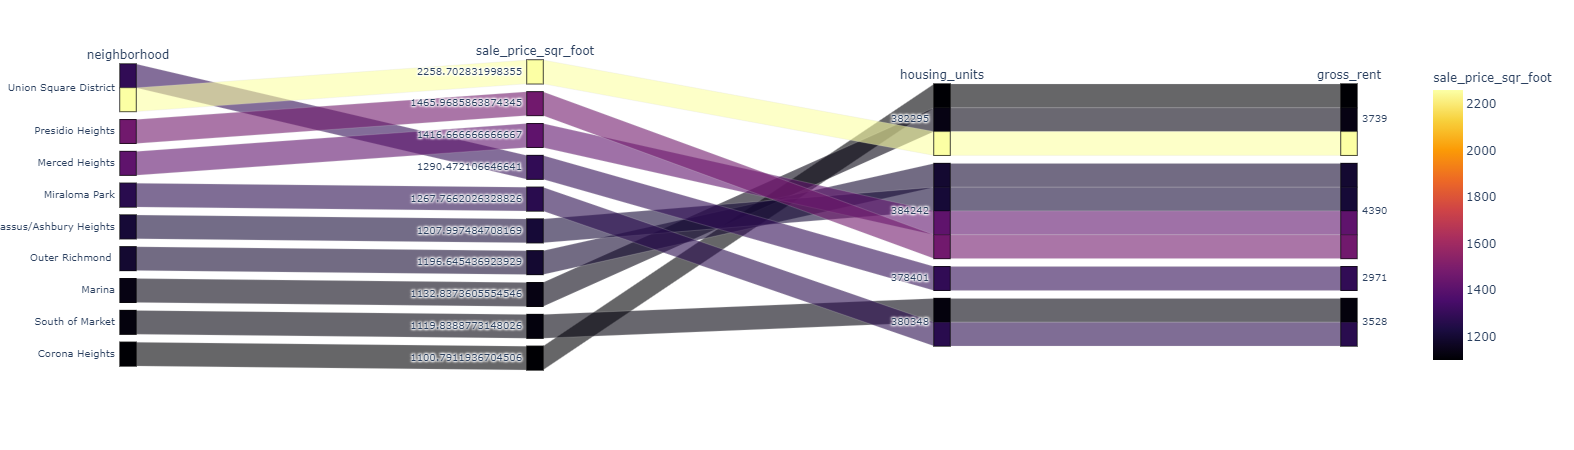

In [21]:
# Parallel Categories Plot
px.parallel_categories(
    expensive,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "neighborhood",
        "sale_price_sqr_foot": "sale_price_sqr_foot",
        "housing_units": "housing_units",
        "gross_rent": "gross_rent",
    }
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [15]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [16]:
# Calculate the mean values for each neighborhood
prep_df = sfo_data.groupby(['neighborhood']).mean()
prep_df = prep_df.reset_index()
prep_df.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [17]:
# Join the average values with the neighborhood locations
join_df = pd.concat([df_neighborhood_locations, prep_df], axis = 1)
join_df.head()

Neighborhood        Lat         Lon     neighborhood  \
0     Alamo Square  37.791012 -122.402100     Alamo Square   
1       Anza Vista  37.779598 -122.443451       Anza Vista   
2          Bayview  37.734670 -122.401060          Bayview   
3  Bayview Heights  37.728740 -122.410980  Bayview Heights   
4   Bernal Heights  37.728630 -122.443050  Bernal Heights    

   sale_price_sqr_foot  housing_units   gross_rent  
0           366.020712       378401.0  2817.285714  
1           373.382198       379050.0  3031.833333  
2           204.588623       376454.0  2318.400000  
3           590.792839       382295.0  3739.000000  
4           576.746488       379374.5  3080.333333

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [18]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

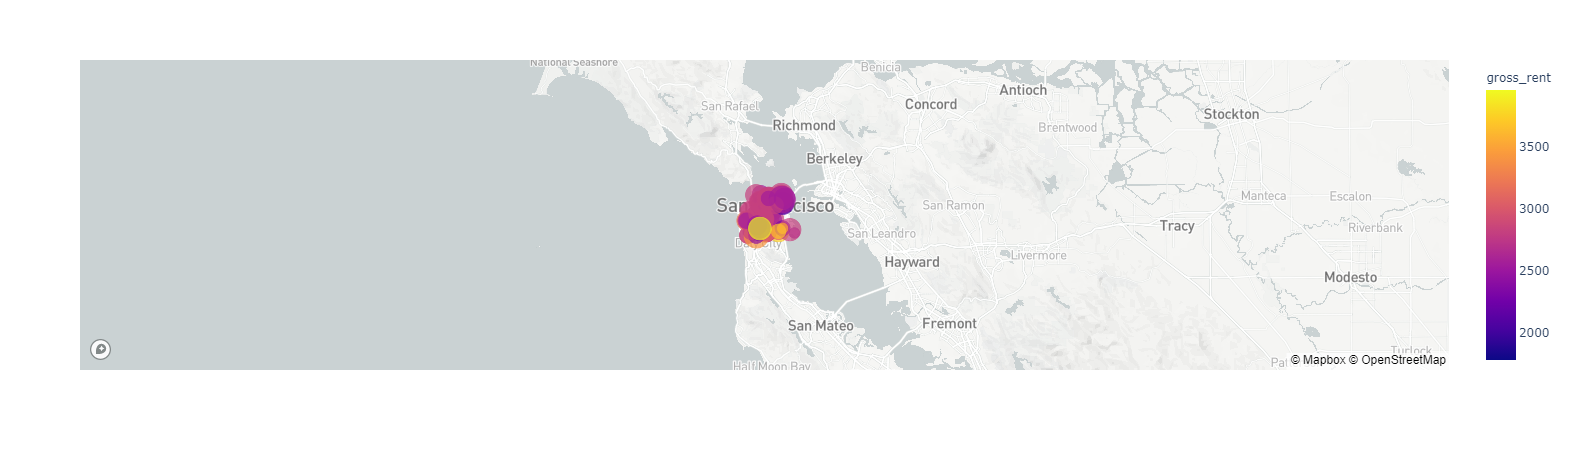

In [19]:
px.set_mapbox_access_token(mapbox_token)
neighborhood_map = px.scatter_mapbox(
    join_df,
    lat= "Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
)

neighborhood_map.show()